In [15]:
from src import freesurfer_utils
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
import nibabel as nib
from dataclasses import dataclass

In [16]:

class FreesurferSubject:
    def __init__(self, subject_path):
        self.subject_path = Path(subject_path)
        self.subject_id = self.subject_path.name
        self.curv = [nib.freesurfer.read_morph_data(str(self.subject_path / 'surf' / 'lh.curv')),
                         nib.freesurfer.read_morph_data(str(self.subject_path / 'surf' / 'rh.curv'))]
        #self.sphere = [nib.freesurfer.read_geometry(str(self.subject_path / 'surf' / 'lh.sphere')),
                         #  nib.freesurfer.read_geometry(str(self.subject_path / 'surf' / 'rh.sphere'))]
        #self.thickness = [nib.freesurfer.read_morph_data(str(self.subject_path / 'surf' / 'lh.thickness')),
                           #     nib.freesurfer.read_morph_data(str(self.subject_path / 'surf' / 'rh.thickness'))]
    
    
  

In [17]:
subjects_dir  = '/Users/benparker/Desktop/cnl/neurocluster/weiner/DevProso/subjects'
subjects_list = subjects_dir + '/all_subjects_list.txt'
subject_paths = freesurfer_utils.get_subjects_list(subjects_list = subjects_list, subjects_dir = subjects_dir)
subjects = [Path(subject_path).name for subject_path in subject_paths]


In [18]:
def get_gyrification_ratio(subject_curv_file: np.array):
    sub_sulc =  np.where(subject_curv_file > 0)[0]
    sub_gyr = np.where(subject_curv_file < 0)[0]
    return len(sub_gyr) / len(sub_sulc)



In [19]:
mfs = pd.read_csv('/Users/benparker/Desktop/cnl/DevProso/data/mfs.csv')
mfs.head()

,sub,hemi,label,vertices,total_surface_area,total_gray_matter_volume,cortical_thickness_mean,cortical_thickness_std,rectified_mean_curvature,rectified_Gaussian_curvature,...,Famous Face,Old-New,max_path_length,group,Sex,Age,FG1_lgi,FG2_lgi,FG3_lgi,FG4_lgi
0,1,rh,MFS,709,501,1251,2.670,0.627,0.104,0.015,...,NaN,NaN,65.449696,Controls,M,49,0.7,0.9,0.9,2.1
1,1,lh,MFS,1019,738,1578,2.514,0.393,0.108,0.014,...,NaN,NaN,62.765262,Controls,M,49,0.5,0.9,1.7,2.9
2,2,rh,MFS,470,351,706,2.503,0.328,0.117,0.016,...,0.43,0.93,32.592076,DPs,M,61,0.8,1.1,1.5,2.3
3,2,lh,MFS,751,561,1129,2.328,0.332,0.106,0.017,...,0.43,0.93,41.841137,DPs,M,61,0.9,1.0,1.7,2.3
4,3,rh,MFS,274,214,621,2.793,0.520,0.133,0.043,...,NaN,NaN,30.554775,Controls,F,52,0.6,0.6,1.6,1.6


In [21]:
gyr_ratio = pd.DataFrame(columns = ['subject', 'lh_gyrification_ratio', 'rh_gyrification_ratio', 'group'])
for i, sub in enumerate(subjects):
    subject_path = Path(subject_paths[i])
    subject = FreesurferSubject(subject_path)
    lh_gyrification_ratio = get_gyrification_ratio(subject.curv[0])
    rh_gyrification_ratio = get_gyrification_ratio(subject.curv[1])
    subject_group = mfs[mfs['sub'] == sub]['group'].values[0]
    gyr_ratio.loc[i, :] = {'subject': sub, 'lh_gyrification_ratio': lh_gyrification_ratio, 
                                  'rh_gyrification_ratio': rh_gyrification_ratio, 'group': subject_group}
    print(f"Completed subject: {sub}")

gyr_ratio.head()


Completed subject: 1
Completed subject: 10
Completed subject: 11
Completed subject: 12
Completed subject: 13
Completed subject: 14
Completed subject: 15
Completed subject: 16
Completed subject: 17
Completed subject: 18
Completed subject: 19
Completed subject: 2
Completed subject: 20
Completed subject: 21
Completed subject: 22
Completed subject: 23
Completed subject: 24
Completed subject: 25
Completed subject: 26
Completed subject: 27
Completed subject: 28
Completed subject: 29
Completed subject: 3
Completed subject: 30
Completed subject: 31
Completed subject: 32
Completed subject: 33
Completed subject: 34
Completed subject: 35
Completed subject: 36
Completed subject: 37
Completed subject: 38
Completed subject: 39
Completed subject: 4
Completed subject: 40
Completed subject: 41
Completed subject: 42
Completed subject: 43
Completed subject: 44
Completed subject: 45
Completed subject: 46
Completed subject: 47
Completed subject: 5
Completed subject: 6
Completed subject: 7
Completed subject

,subject,lh_gyrification_ratio,rh_gyrification_ratio,group
0,1,1.092699,1.07893,Controls
1,10,1.076417,1.077424,Controls
2,11,1.089054,1.089005,Controls
3,12,1.095601,1.072004,Controls
4,13,1.080415,1.09063,Controls


In [25]:
gyr_ratio.group

0     Controls
1     Controls
2     Controls
3     Controls
4     Controls
        ...   
77         DPs
78    Controls
79         DPs
80    Controls
81    Controls
Name: group, Length: 82, dtype: object

In [26]:
lh_dp_mean = gyr_ratio[gyr_ratio['group'] == 'DPs']['lh_gyrification_ratio'].mean()
rh_dp_mean = gyr_ratio[gyr_ratio['group'] == 'DPs']['rh_gyrification_ratio'].mean()
lh_control_mean = gyr_ratio[gyr_ratio['group'] == 'Controls']['lh_gyrification_ratio'].mean()
rh_control_mean = gyr_ratio[gyr_ratio['group'] == 'Controls']['rh_gyrification_ratio'].mean()

In [27]:
print(f"DP mean gyrification ratio: {lh_dp_mean}, {rh_dp_mean}")
print(f"Control mean gyrification ratio: {lh_control_mean}, {rh_control_mean}")

DP mean gyrification ratio: 1.0861832792187418, 1.0861853571231281
Control mean gyrification ratio: 1.092563650001628, 1.0840583712590703


In [38]:
from scipy.stats import ttest_ind
lh_ttest = ttest_ind(gyr_ratio[gyr_ratio['group'] == 'DPs']['lh_gyrification_ratio'].tolist(), gyr_ratio[gyr_ratio['group'] == 'Controls']['lh_gyrification_ratio'].tolist())
rh_ttest = ttest_ind(gyr_ratio[gyr_ratio['group'] == 'DPs']['rh_gyrification_ratio'].tolist(), gyr_ratio[gyr_ratio['group'] == 'Controls']['rh_gyrification_ratio'].tolist())

Left hemisphere ttest: t = -1.6107174615064477 | p = 0.11118018427618094
Right hemisphere ttest: t = 0.5075424454001416 | p = 0.6131706719954104


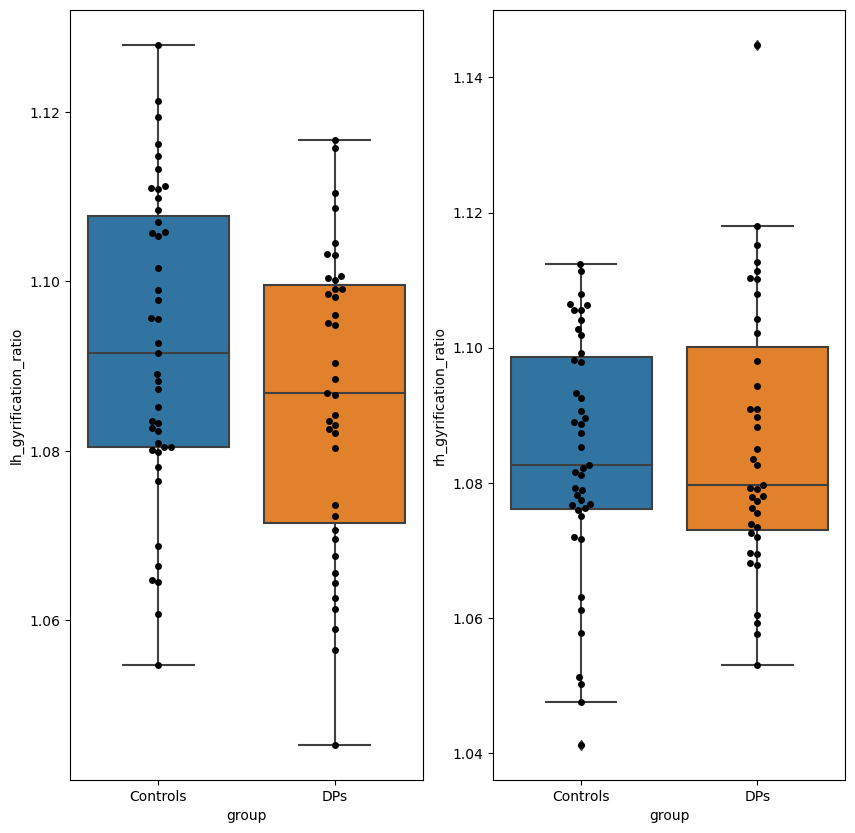

In [40]:

fig, ax = plt.subplots(figsize = (10, 10), nrows = 1, ncols = 2)
sns.swarmplot(x = 'group', y = 'lh_gyrification_ratio', data = gyr_ratio, ax=ax[0], color='black')
sns.boxplot(x = 'group', y = 'lh_gyrification_ratio', data = gyr_ratio, ax=ax[0])
sns.swarmplot(x = 'group', y = 'rh_gyrification_ratio', data = gyr_ratio, ax=ax[1], color='black')
sns.boxplot(x = 'group', y = 'rh_gyrification_ratio', data = gyr_ratio, ax=ax[1])

print(f"Left hemisphere ttest: t = {lh_ttest[0]} | p = {lh_ttest[1]}")
print(f"Right hemisphere ttest: t = {rh_ttest[0]} | p = {rh_ttest[1]}")